In [18]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import keras
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution


model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy
model.save('num_reader.model')

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4787 - accuracy: 0.8649
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1134 - accuracy: 0.9646
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9710
0.0935666486620903
0.9710000157356262
INFO:tensorflow:Assets written to: num_reader.model/assets


In [19]:
new_model = keras.models.load_model('num_reader.model')

In [20]:
predictions = new_model.predict(x_test)
print(predictions)

[[1.1401465e-09 1.0346425e-08 5.8149358e-06 ... 9.9998724e-01
  1.8077841e-09 2.0558975e-09]
 [2.0894308e-06 3.0010422e-03 9.9695885e-01 ... 1.9663215e-08
  2.6218322e-07 1.9030182e-10]
 [8.2588926e-08 9.9983871e-01 3.2347566e-06 ... 4.8853595e-05
  1.6037378e-05 1.8096243e-06]
 ...
 [1.4007092e-08 6.9643335e-07 2.0199893e-08 ... 1.4224775e-05
  1.2857100e-06 4.8288284e-04]
 [5.8857527e-06 6.0575678e-07 5.4186476e-08 ... 4.9120285e-07
  2.5060942e-04 1.0121026e-06]
 [1.1538646e-04 1.0813947e-06 2.5008208e-06 ... 2.2151207e-08
  6.1524916e-06 1.3936751e-06]]


In [21]:
import numpy as np

print(np.argmax(predictions[0]))

7


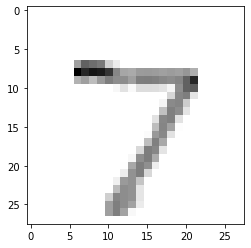

In [22]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

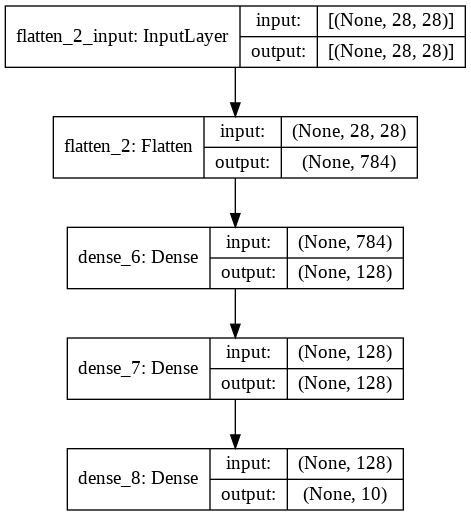

In [24]:
from keras.utils import plot_model
plot_model(new_model, show_shapes=True, show_layer_names=True)